# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [150]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [151]:
plant = pd.read_csv("data/31.finaldata_plant/plant_wsASOSsky.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,7.5,0.0,345.8,0.40,1011.4,1014.9,40.30,0.000,0.0,1.0
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750,23.000000,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.000000,0.300000,10.0,4.0,9.8,1015.0,44.000000,7.5,0.0,345.8,0.40,1011.4,1014.9,40.30,0.000,0.0,2.0
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.3,1015.0,0.0,4.200,1.150,1.700,179.850,2.625,172.275,187.000000,2.0,3.2,1014.8,77.0,6.4,0.0,0.0,130.000000,3.700000,143.0,5.0,9.0,1014.9,55.000000,3.7,0.0,76.0,0.40,1011.9,1015.5,66.20,0.000,0.0,4.0
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.5,1016.2,0.0,10.575,0.775,1.275,208.075,2.150,203.200,186.000000,2.0,3.2,1015.7,51.0,9.6,0.0,0.0,51.000000,1.500000,143.0,5.0,8.8,1016.7,56.000000,12.9,0.0,294.2,0.70,1013.2,1016.7,41.20,1.390,6960.0,4.0
4,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,4,14.00,37.00,11.00,18.00,59.00,11.00,23.00,9.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,10.2,0.0,320.0,0.55,1012.3,1015.8,40.75,0.695,3480.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.000000,8.0,10.0,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,3.4,0.0,319.3,3.50,1020.8,1024.0,55.30,22.300,36600.0,2.0
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.666667,8.0,10.1,1023.7,57.0,5.6,2.0,0.0,299.666667,8.066667,313.0,14.0,5.0,1023.2,47.333333,3.1,0.0,314.6,2.60,1020.8,1024.1,57.80,22.300,36600.0,2.0
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,334.

In [152]:
plant.columns

Index(['MEA_DDHR', 'PLANT', 'LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL',
       'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'COND_LOC', 'X24H_TMA', 'X24H_COND_LOC',
       'X48H_TMA', 'X48H_COND_LOC', 'DEW_POINT_COIL', 'IN_OUT_TEM_D',
       'IN_COIL_TEM_D', 'RULL_COND_LOC', 'RULL_X24H_COND_LOC',
       'RULL_X48H_COND_LOC', 'MONTH', 'TEM_IN_MAX', 'HUM_IN_MAX',
       'TEM_COIL_MAX', 'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX', 'TEM_IN_MIN',
       'HUM_IN_MIN', 'TEM_COIL_MIN', 'TEM_OUT_LOC1_MIN', 'HUM_OUT_LOC1_MIN',
       'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD',
       'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA',
       'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS',
       'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'ASOS_TEMP',
       'ASOS_RAIN_CUM', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS',
       'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE',
       'SKY'],
      dtype='object')

## 정규화 할 list 나누기

In [153]:
dummy_list = ["MONTH", "SKY"]
caling_list= ["AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [154]:
caling_list.extend(["DEW_POINT_COIL", "IN_OUT_TEM_D", "IN_COIL_TEM_D", "ASOS_RAIN_CUM", "ASOS_TEMP", "ASOS_WIND_DIR", "ASOS_WIND_SPD", "ASOS_PRESS", "ASOS_SEA_PRESS", "ASOS_HUMID", "ASOS_SOLAR_RAD", "ASOS_SUNSHINE", 
                   'TEM_IN_MAX', 'HUM_IN_MAX','TEM_COIL_MAX', 'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX', 'TEM_IN_MIN','HUM_IN_MIN', 'TEM_COIL_MIN', 'TEM_OUT_LOC1_MIN', 'HUM_OUT_LOC1_MIN',])
caling_list

['AVG_PA',
 'AVG_PS',
 'HR1_RN',
 'AVG_TA',
 'AVG_WS',
 'MAX_WS',
 'MAX_WS_WD',
 'MAX_INS_WS',
 'MAX_INS_WS_WD',
 'WD_N1',
 'WS_N1',
 'GUST_WS_N1',
 'PA',
 'BUOY_HM',
 'BUOY_TA',
 'MAX_WH',
 'AVG_WH',
 'LB_WD',
 'LB_WS',
 'LB_MAX_INS_WD',
 'LB_MAX_IWS',
 'LB_TA',
 'LB_PS',
 'LB_HM',
 'DEW_POINT_COIL',
 'IN_OUT_TEM_D',
 'IN_COIL_TEM_D',
 'ASOS_RAIN_CUM',
 'ASOS_TEMP',
 'ASOS_WIND_DIR',
 'ASOS_WIND_SPD',
 'ASOS_PRESS',
 'ASOS_SEA_PRESS',
 'ASOS_HUMID',
 'ASOS_SOLAR_RAD',
 'ASOS_SUNSHINE',
 'SKY',
 'TEM_IN_MAX',
 'HUM_IN_MAX',
 'TEM_COIL_MAX',
 'TEM_OUT_LOC1_MAX',
 'HUM_OUT_LOC1_MAX',
 'TEM_IN_MIN',
 'HUM_IN_MIN',
 'TEM_COIL_MIN',
 'TEM_OUT_LOC1_MIN',
 'HUM_OUT_LOC1_MIN']

In [155]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'SKY', 'TEM_IN_MAX', 'HUM_IN_MAX', 'TEM_COIL_MAX', 'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX', 'TEM_IN_MIN', 'HUM_IN_MIN', 'TEM_COIL_MIN', 'TEM_OUT_LOC1_MIN', 'HUM_OUT_LOC1_MIN']
dummy_category: ['PLANT', 'LOC', 'MONTH']


,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229621,-0.211510,-0.149371,-0.372578,-1.247686,-1.262094,-0.969694,-1.347910,-0.756209,-0.432802,-0.751151,-0.865762,-0.296823,-0.038947,-0.363989,-0.629993,-0.28037,-1.177001,-1.285396,-1.301061,-1.093753,-0.277482,-0.246963,-0.806662,-1.265315,1.518995,2.696145,-0.185415,-0.386723,1.391918,-0.920668,-0.383481,-0.363830,-1.606857,-0.878216,-0.870588,-1.191161,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356524,-0.337844,-0.149371,-0.561844,-1.206929,-1.206934,-0.484769,-1.209741,-0.755864,-1.478868,0.675180,0.417005,0.557785,-1.204502,-0.599810,-0.629993,-0.28037,0.215302,-1.454298,-1.743456,-1.093753,-0.197763,-0.327758,-1.415519,-1.168263,1.518995,2.103933,-0.185415,-0.386723,1.391918,-0.920668,-0.383481,-0.363830,-1.606857,-0.878216,-0.870588,-0.415669,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2016-04-01 06:00:00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,0,0,0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.344987,-0.326359,-0.149371,-0.688763,-0.697469,-0.673716,-0.274342,-0.691607,-0.348137,-0.049244,-0.751151,-0.714848,-0.377665,0.252441,-0.588581,-0.629993,-0.28037,-0.694336,-0.305767,-0.566684,-0.852959,-0.277482,-0.339300,-0.806662,-0.983448,1.518995,1.511720,-0.185415,-0.726780,-0.571744,-0.920668,-0.325474,-0.294561,-0.342147,-0.878216,-0.870588,1.135317,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2016-04-01 09:00:00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,0,0,0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.206548,-0.188540,-0.149371,-0.120966,-1.003145,-0.986292,0.106381,-0.910375,0.078923,-0.057961,-0.751151,-0.714848,-0.273726,-1.262780,-0.229234,-0.629993,-0.28037,-1.427615,-1.048934,-0.566684,-0.852959,-0.297411,-0.131542,-0.751311,-0.983448,-2.765951,1.511720,-0.185415,0.096517,1.016363,-0.729508,-0.174653,-0.156024,-1.562909,-0.697881,-0.372185,1.135317,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229621,-0.211510,-0.149371,-0.372578,-1.247686,-1.262094,-0.969694,-1.347910,-0.756209,-0.432802,-0.751151,-0.865762,-0.296823,-0.038947,-0.363989,-0.629993,-0.28037,-1.177001,-1.285396,-1.301061,-1.093753,-0.277482,-0.246963,-0.806662,-1.312175,0.804837,1.511720,-0.185415,-0.145103,1.204140,-0.825088,-0.279067,-0.259927,-1.584883,-0.788049,-0.621387,-1.191161,-0.387887,-1.789511,-0.540838,-0.052399,-1.293506,-0.406263,-1.635245,-0.637392,-0.428345,-0.784557,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [156]:
plant = plant.drop(['COND_LOC'], axis=1)
plant

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229621,-0.211510,-0.149371,-0.372578,-1.247686,-1.262094,-0.969694,-1.347910,-0.756209,-0.432802,-0.751151,-0.865762,-0.296823,-0.038947,-0.363989,-0.629993,-0.28037,-1.177001,-1.285396,-1.301061,-1.093753,-0.277482,-0.246963,-0.806662,-1.265315,1.518995,2.696145,-0.185415,-0.386723,1.391918,-0.920668,-0.383481,-0.363830,-1.606857,-0.878216,-0.870588,-1.191161,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356524,-0.337844,-0.149371,-0.561844,-1.206929,-1.206934,-0.484769,-1.209741,-0.755864,-1.478868,0.675180,0.417005,0.557785,-1.204502,-0.599810,-0.629993,-0.28037,0.215302,-1.454298,-1.743456,-1.093753,-0.197763,-0.327758,-1.415519,-1.168263,1.518995,2.103933,-0.185415,-0.386723,1.391918,-0.920668,-0.383481,-0.363830,-1.606857,-0.878216,-0.870588,-0.415669,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2016-04-01 06:00:00,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,0,0,0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.344987,-0.326359,-0.149371,-0.688763,-0.697469,-0.673716,-0.274342,-0.691607,-0.348137,-0.049244,-0.751151,-0.714848,-0.377665,0.252441,-0.588581,-0.629993,-0.28037,-0.694336,-0.305767,-0.566684,-0.852959,-0.277482,-0.339300,-0.806662,-0.983448,1.518995,1.511720,-0.185415,-0.726780,-0.571744,-0.920668,-0.325474,-0.294561,-0.342147,-0.878216,-0.870588,1.135317,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2016-04-01 09:00:00,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,0,0,0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.206548,-0.188540,-0.149371,-0.120966,-1.003145,-0.986292,0.106381,-0.910375,0.078923,-0.057961,-0.751151,-0.714848,-0.273726,-1.262780,-0.229234,-0.629993,-0.28037,-1.427615,-1.048934,-0.566684,-0.852959,-0.297411,-0.131542,-0.751311,-0.983448,-2.765951,1.511720,-0.185415,0.096517,1.016363,-0.729508,-0.174653,-0.156024,-1.562909,-0.697881,-0.372185,1.135317,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229621,-0.211510,-0.149371,-0.372578,-1.247686,-1.262094,-0.969694,-1.347910,-0.756209,-0.432802,-0.751151,-0.865762,-0.296823,-0.038947,-0.363989,-0.629993,-0.28037,-1.177001,-1.285396,-1.301061,-1.093753,-0.277482,-0.246963,-0.806662,-1.312175,0.804837,1.511720,-0.185415,-0.145103,1.204140,-0.825088,-0.279067,-0.259927,-1.584883,-0.788049,-0.621387,-1.191161,-0.387887,-1.789511,-0.540838,-0.052399,-1.293506,-0.406263,-1.635245,-0.637392,-0.428345,-0.784557,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## test_data validation & 정규화 preprocessing

In [157]:
test_data = pd.read_csv("data/31.finaldata_plant/test_wsASOSsky.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,0,0,0,3.97,-1.93,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.200000,1023.700000,0.0,3.150000,2.125000,2.550000,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0,1.0
1,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,0,0,0,-2.81,0.38,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.633333,1024.100000,0.0,4.958333,2.791667,3.275000,288.208333,5.533333,274.216667,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0,1.0
2,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,0,0,0,3.94,-0.76,4,10.03,48.81,10.79,6.09,59.34,10.03,48.81,10.79,6.09,59.34,1022.066667,1024.500000,0.0,6.766667,3.458333,4.000000,307.091667,6.816667,265.083333,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0,1.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0,0,0,0.00,1.46,4,12.32,34.13,10.86,12.32,28.27,12.32,34.13,10.86,12.32,28.27,1022.500000,1024.900000,0.0,8.575000,4.125000,4.725000,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0,3.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,0,0,0,-0.73,2.52,4,11.28,30.59,8.92,12.01,42.28,10.06,22.65,8.76,5.15,19.84,1021.566667,1023.966667,0.0,8.750000,4.091667,4.758333,311.766667,7.933333,271.891667,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0,9.8,0.0,349.8,3.2,1020.8,1024.0,24.9,12.76,22980.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,0,0,0,4.45,-2.57,3,10.73,33.36,13.30,6.28,46.37,10.73,33.36,13.30,6.28,46.37,1020.500000,1023.000000,0.0,1.450000,1.225000,1.400000,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0,3.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,0,0,0,7.76,-2.55,3,9.15,38.86,11.70,1.39,74.33,9.15,38.86,11.70,1.39,74.33,1020.700000,1023.200000,0.0,0.175000,0.875000,1.225000,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0,3.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,0,0,0,2.84,-1.93,3,7.10,44.87,9.03,4.26,58.06,7.10,44.87,9.03,4.26,58.06,1021.300000,1023.800000,0.0,-0.500000,1.200000,1.650000,179.450000,2.375000,170.9000

In [158]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'SKY', 'TEM_IN_MAX', 'HUM_IN_MAX', 'TEM_COIL_MAX', 'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX', 'TEM_IN_MIN', 'HUM_IN_MIN', 'TEM_COIL_MIN', 'TEM_OUT_LOC1_MIN', 'HUM_OUT_LOC1_MIN']
dummy_category: ['PLANT', 'LOC', 'MONTH']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,0,0,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.720377,0.729730,-0.20612,-0.987588,0.174433,0.018080,1.209091,0.119321,1.460213,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100672,1.559591,-0.065321,0.786155,0.804619,-0.487809,1.993891,1.900372,-1.366710,-0.839957,-1.188420,-0.657602,-0.274269,-0.824370,-0.886258,-0.906796,-0.741845,-0.914086,-1.435616,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,0,0,0,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.771336,0.776293,-0.20612,-0.792966,0.764439,0.597751,1.479655,0.755006,1.328468,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422226,-1.155722,1.041851,0.893171,0.898538,-1.958990,-0.202462,0.099282,-1.366710,-0.839957,-1.188420,-0.657602,-0.274269,-0.824370,-0.886258,-0.906796,-0.741845,-0.914086,-1.435616,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0,0,0,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.822295,0.822856,-0.20612,-0.598345,1.354445,1.177423,1.750219,1.390691,1.196722,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439895,-0.404570,-0.977110,0.726702,0.745919,0.545350,-0.837246,-0.819095,-1.366710,-0.771935,-0.601864,-0.578879,-0.929199,-0.583452,-0.672355,-0.312053,-0.547202,-0.714967,-0.085150,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,0,0,0,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.873254,0.869420,-0.20612,-0.403723,1.944451,1.757094,2.020783,2.026376,1.064976,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337420,1.772756,0.911595,0.869389,0.875058,-2.268461,-0.052653,0.233026,0.333092,-0.503367,-1.694586,-0.570893,-0.267900,-2.239495,-0.409002,-1.352676,-0.539280,-0.058613,-1.627760,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,0,0,0,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.763496,0.760772,-0.20612,-0.384889,1.914951,1.783746,1.817204,1.943819,1.294930,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273816,1.724540,0.911595,0.774265,0.781139,-2.301789,0.782723,0.888373,0.333092,-0.625337,-1.958090,-0.792230,-0.300806,-1.492757,-0.668905,-2.166461,-0.776926,-0.814000,-2.046306,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# 데이터 분류

## plant_train 데이터
### train, test 데이터 분리

In [159]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,0.0,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229621,-0.211510,-0.149371,-0.372578,-1.247686,-1.262094,-0.969694,-1.347910,-0.756209,-0.432802,-0.751151,-0.865762,-0.296823,-0.038947,-0.363989,-0.629993,-0.28037,-1.177001,-1.285396,-1.301061,-1.093753,-0.277482,-0.246963,-0.806662,-1.265315,1.518995,2.696145,-0.185415,-0.386723,1.391918,-0.920668,-0.383481,-0.363830,-1.606857,-0.878216,-0.870588,-1.191161,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356524,-0.337844,-0.149371,-0.561844,-1.206929,-1.206934,-0.484769,-1.209741,-0.755864,-1.478868,0.675180,0.417005,0.557785,-1.204502,-0.599810,-0.629993,-0.28037,0.215302,-1.454298,-1.743456,-1.093753,-0.197763,-0.327758,-1.415519,-1.168263,1.518995,2.103933,-0.185415,-0.386723,1.391918,-0.920668,-0.383481,-0.363830,-1.606857,-0.878216,-0.870588,-0.415669,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0,0,0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.344987,-0.326359,-0.149371,-0.688763,-0.697469,-0.673716,-0.274342,-0.691607,-0.348137,-0.049244,-0.751151,-0.714848,-0.377665,0.252441,-0.588581,-0.629993,-0.28037,-0.694336,-0.305767,-0.566684,-0.852959,-0.277482,-0.339300,-0.806662,-0.983448,1.518995,1.511720,-0.185415,-0.726780,-0.571744,-0.920668,-0.325474,-0.294561,-0.342147,-0.878216,-0.870588,1.135317,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0,0,0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.206548,-0.188540,-0.149371,-0.120966,-1.003145,-0.986292,0.106381,-0.910375,0.078923,-0.057961,-0.751151,-0.714848,-0.273726,-1.262780,-0.229234,-0.629993,-0.28037,-1.427615,-1.048934,-0.566684,-0.852959,-0.297411,-0.131542,-0.751311,-0.983448,-2.765951,1.511720,-0.185415,0.096517,1.016363,-0.729508,-0.174653,-0.156024,-1.562909,-0.697881,-0.372185,1.135317,-0.187932,-2.109275,-0.540838,-0.052399,-1.293506,-0.203666,-1.561137,-0.538764,-0.428345,-0.784557,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.0,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229621,-0.211510,-0.149371,-0.372578,-1.247686,-1.262094,-0.969694,-1.347910,-0.756209,-0.432802,-0.751151,-0.865762,-0.296823,-0.038947,-0.363989,-0.629993,-0.28037,-1.177001,-1.285396,-1.301061,-1.093753,-0.277482,-0.246963,-0.806662,-1.312175,0.804837,1.511720,-0.185415,-0.145103,1.204140,-0.825088,-0.279067,-0.259927,-1.584883,-0.788049,-0.621387,-1.191161,-0.387887,-1.789511,-0.540838,-0.052399,-1.293506,-0.406263,-1.635245,-0.637392,-0.428345,-0.784557,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [160]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [162]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

## Random UnderSampling
-- Sampling 변수를 잘 확인해야함

In [163]:
from imblearn.under_sampling import *

In [164]:
rus = RandomUnderSampler(random_state=42)

In [165]:
X_undersampled24, y_undersampled24 = rus.fit_resample(X_train, y_train24)
X_undersampled48, y_undersampled48 = rus.fit_resample(X_train, y_train48)

## test_data 만들기

In [166]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

In [167]:
test_X

,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,0,0,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.720377,0.729730,-0.20612,-0.987588,0.174433,0.018080,1.209091,0.119321,1.460213,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100672,1.559591,-0.065321,0.786155,0.804619,-0.487809,1.993891,1.900372,-1.366710,-0.839957,-1.188420,-0.657602,-0.274269,-0.824370,-0.886258,-0.906796,-0.741845,-0.914086,-1.435616,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.771336,0.776293,-0.20612,-0.792966,0.764439,0.597751,1.479655,0.755006,1.328468,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422226,-1.155722,1.041851,0.893171,0.898538,-1.958990,-0.202462,0.099282,-1.366710,-0.839957,-1.188420,-0.657602,-0.274269,-0.824370,-0.886258,-0.906796,-0.741845,-0.914086,-1.435616,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.822295,0.822856,-0.20612,-0.598345,1.354445,1.177423,1.750219,1.390691,1.196722,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439895,-0.404570,-0.977110,0.726702,0.745919,0.545350,-0.837246,-0.819095,-1.366710,-0.771935,-0.601864,-0.578879,-0.929199,-0.583452,-0.672355,-0.312053,-0.547202,-0.714967,-0.085150,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.873254,0.869420,-0.20612,-0.403723,1.944451,1.757094,2.020783,2.026376,1.064976,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337420,1.772756,0.911595,0.869389,0.875058,-2.268461,-0.052653,0.233026,0.333092,-0.503367,-1.694586,-0.570893,-0.267900,-2.239495,-0.409002,-1.352676,-0.539280,-0.058613,-1.627760,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.763496,0.760772,-0.20612,-0.384889,1.914951,1.783746,1.817204,1.943819,1.294930,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273816,1.724540,0.911595,0.774265,0.781139,-2.301789,0.782723,0.888373,0.333092,-0.625337,-1.958090,-0.792230,-0.300806,-1.492757,-0.668905,-2.166461,-0.776926,-0.814000,-2.046306,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0,0,0,-0.639614,-1.563968,-0.277684,-0.797087,-0.973308,0.638058,0.648244,-0.20612,-1.170550,-0.622075,-0.901400,0.966945,-0.908507,1.167031,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,1.386802,-0.015526,1.263465,-0.014602,-0.844050,0.651951,-1.7229

# Random Forest
## 24시간 후 결로 예측

### UnderSampling

In [168]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under24.fit(X_undersampled24, y_undersampled24)

C:\Users\B0113\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=42)

In [169]:
y_pred_under24 = rf_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.15      0.98      0.26       594

    accuracy                           0.97    104796
   macro avg       0.58      0.97      0.62    104796
weighted avg       1.00      0.97      0.98    104796



## 변수 중요도

In [170]:
rf_clf_under24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under24.feature_importances_], columns=['variable', 'importance'])
rf_clf_under24_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under24_df.tail(20)

,variable,importance
24,AVG_WH,0.00179781
56,PLANT_2,0.00169577
60,MONTH_1,0.00144058
61,MONTH_2,0.00141673
55,PLANT_1,0.00131209
23,MAX_WH,0.0012008
57,LOC_1,0.000904925
10,HR1_RN,0.000814038
0,RULL_COND_LOC,0.000621881
68,MONTH_9,0.000594567


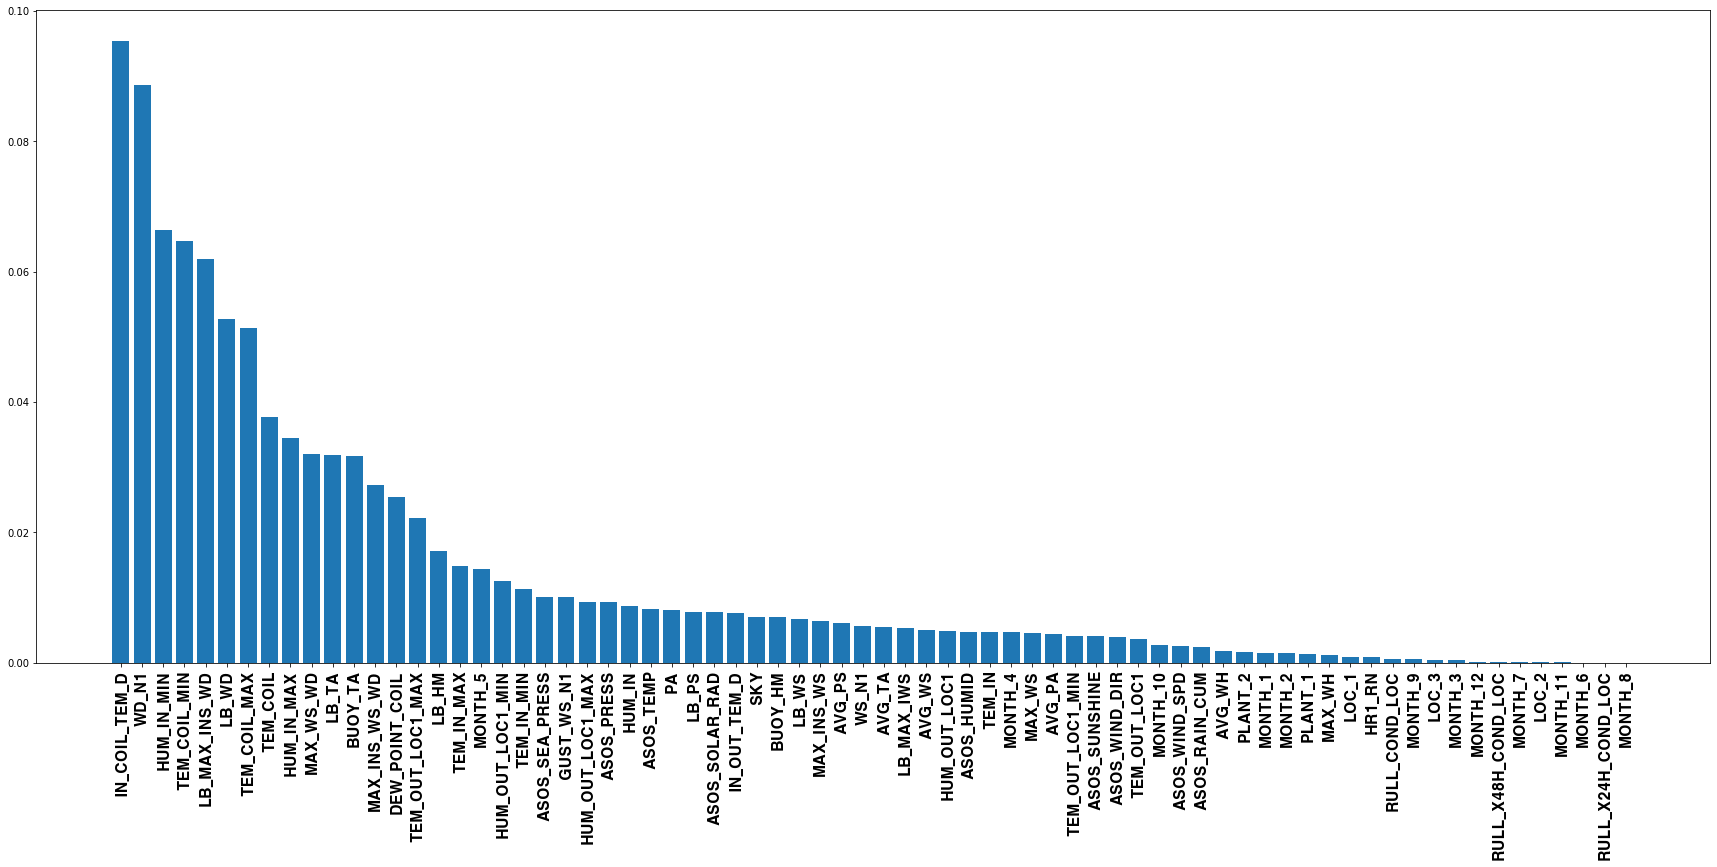

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

### UnderSampling

In [172]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under48.fit(X_undersampled48, y_undersampled48)

C:\Users\B0113\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=42)

In [173]:
y_pred_under48 = rf_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    104202
         1.0       0.16      0.97      0.27       594

    accuracy                           0.97    104796
   macro avg       0.58      0.97      0.63    104796
weighted avg       1.00      0.97      0.98    104796



## 변수 중요도

In [174]:
rf_clf_under48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under48.feature_importances_], columns=['variable', 'importance'])
rf_clf_under48_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under48_df.tail(20)

,variable,importance
61,MONTH_2,0.00317976
23,MAX_WH,0.00233085
44,SKY,0.00194633
24,AVG_WH,0.00175863
56,PLANT_2,0.00173196
55,PLANT_1,0.0016168
2,RULL_X48H_COND_LOC,0.00112701
70,MONTH_11,0.00103779
63,MONTH_4,0.000674023
10,HR1_RN,0.000616039


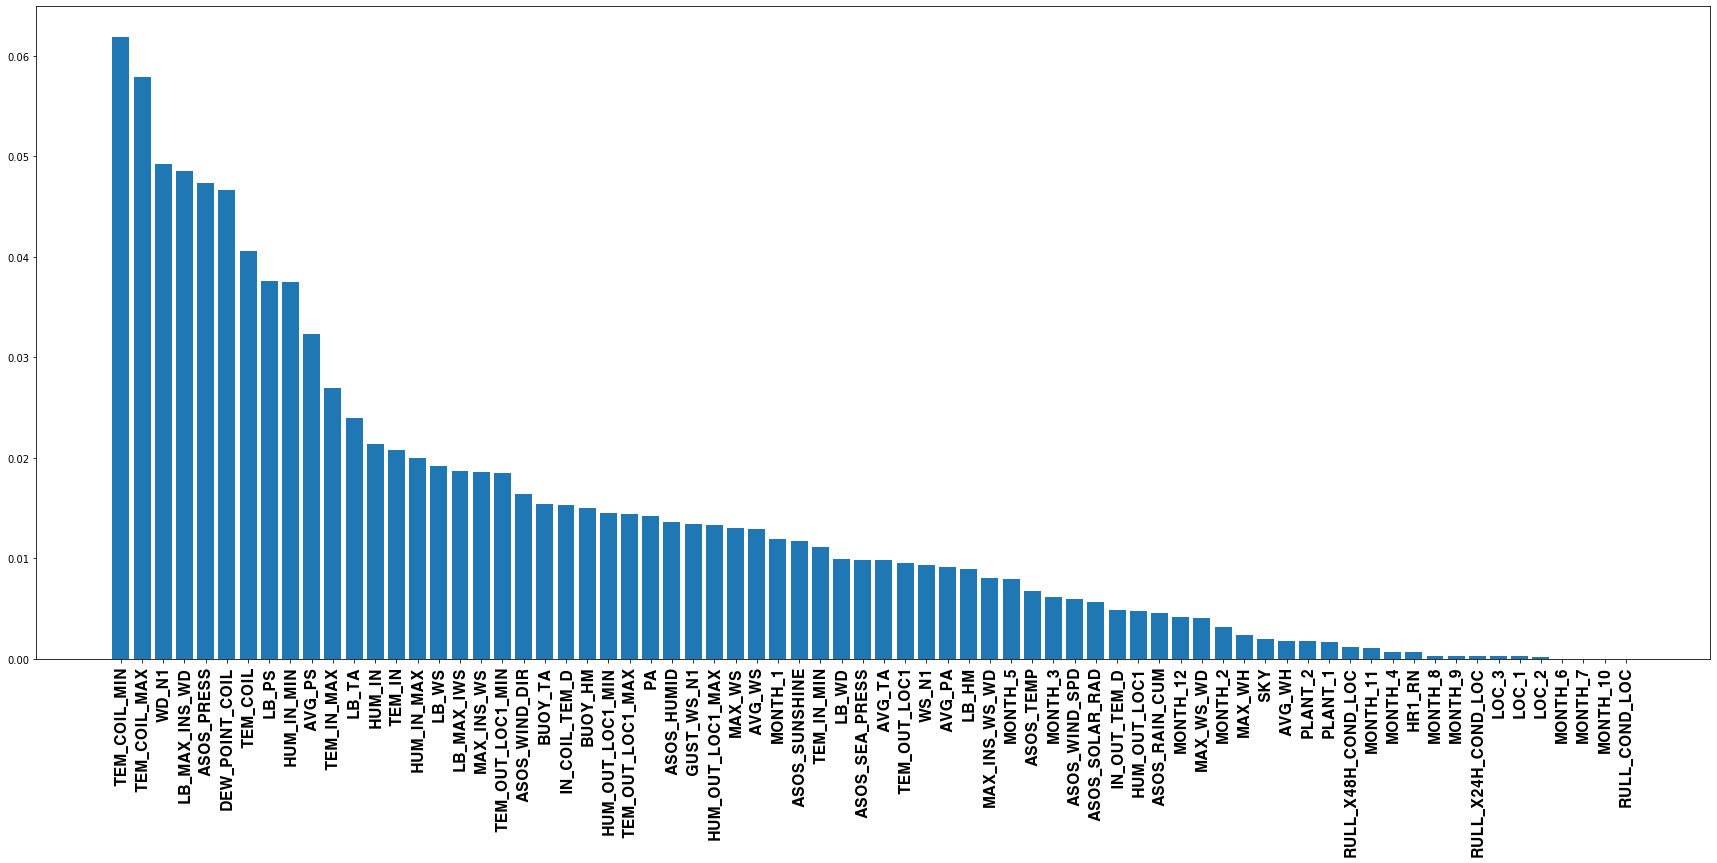

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under48_df.variable, rf_clf_under48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [176]:
validation = etl.makeValiation(test_data, rf_clf_under24, rf_clf_under48, test_X)
validation

C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarnin

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,10,2019-04-03 00:00:00,0,10
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,30
2,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,10
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,20
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,10
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,10
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,20
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,20
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,10,2020-03-31 11:30:00,0,20


In [177]:
etl.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1733,2019-10-11 14:00:00,1,3,2019-10-12 14:00:00,1,60,2019-10-13 14:00:00,0,30
1944,2019-11-15 22:30:00,1,2,2019-11-16 22:30:00,1,60,2019-11-17 22:30:00,0,20
1945,2019-11-15 23:00:00,1,2,2019-11-16 23:00:00,1,60,2019-11-17 23:00:00,0,30
1946,2019-11-15 23:30:00,1,2,2019-11-16 23:30:00,1,60,2019-11-17 23:30:00,0,10
1958,2019-11-16 00:30:00,2,1,2019-11-17 00:30:00,1,60,2019-11-18 00:30:00,0,20
...,...,...,...,...,...,...,...,...,...
3491,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,90,2020-03-27 20:00:00,0,10
3499,2020-03-26 01:30:00,2,1,2020-03-27 01:30:00,1,80,2020-03-28 01:30:00,0,30
3500,2020-03-26 02:00:00,2,1,2020-03-27 02:00:00,1,70,2020-03-28 02:00:00,0,30
3501,2020-03-26 02:30:00,2,1,2020-03-27 02:30:00,1,70,2020-03-28 02:30:00,0,30


In [178]:
etl.findCondRow(validation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
64,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,0,40,2019-04-09 03:00:00,1,60
215,2019-04-24 06:00:00,2,3,2019-04-25 06:00:00,0,10,2019-04-26 06:00:00,1,60
217,2019-04-24 04:30:00,1,2,2019-04-25 04:30:00,0,10,2019-04-26 04:30:00,1,60
266,2019-04-29 12:30:00,2,3,2019-04-30 12:30:00,0,30,2019-05-01 12:30:00,1,70
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,0,30,2019-05-16 09:30:00,1,60
...,...,...,...,...,...,...,...,...,...
3183,2020-02-22 00:30:00,1,2,2020-02-23 00:30:00,0,0,2020-02-24 00:30:00,1,60
3196,2020-02-23 13:30:00,1,3,2020-02-24 13:30:00,0,0,2020-02-25 13:30:00,1,60
3332,2020-03-09 04:30:00,2,2,2020-03-10 04:30:00,0,30,2020-03-11 04:30:00,1,60
3333,2020-03-09 11:30:00,1,2,2020-03-10 11:30:00,0,50,2020-03-11 11:30:00,1,60


# LightGBM
## 24 시간 결로 예측

### UnderSampling

In [179]:
from lightgbm import LGBMClassifier
lgbm_clf_under24 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under24.fit(X_undersampled24, y_undersampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled24, y_undersampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_clf_under24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0113\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	training's auc: 0.974281	training's binary_logloss: 0.622276	valid_1's auc: 0.960291	valid_1's binary_logloss: 0.626609
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.979083	training's binary_logloss: 0.563765	valid_1's auc: 0.965042	valid_1's binary_logloss: 0.572009
[3]	training's auc: 0.980007	training's binary_logloss: 0.516062	valid_1's auc: 0.966147	valid_1's binary_logloss: 0.527279
[4]	training's auc: 0.982236	training's binary_logloss: 0.475211	valid_1's auc: 0.96862	valid_1's binary_logloss: 0.490104
[5]	training's auc: 0.98414	training's binary_logloss: 0.437543	valid_1's auc: 0.971401	valid_1's binary_logloss: 0.455679
[6]	training's auc: 0.98681	training's binary_logloss: 0.402856	valid_1's auc: 0.975739	valid_1's binary_logloss: 0.422926
[7]	training's auc: 0.987268	training's binary_logloss: 0.373771	valid_1's auc: 0.975531	valid_1's binary_logloss: 0.397071
[8]	training's auc: 0.988502	training's binary_logloss: 0.348015	valid_1'

[70]	training's auc: 1	training's binary_logloss: 0.0169308	valid_1's auc: 0.995463	valid_1's binary_logloss: 0.103577
[71]	training's auc: 1	training's binary_logloss: 0.0162084	valid_1's auc: 0.995516	valid_1's binary_logloss: 0.103382
[72]	training's auc: 1	training's binary_logloss: 0.0155374	valid_1's auc: 0.99552	valid_1's binary_logloss: 0.10274
[73]	training's auc: 1	training's binary_logloss: 0.0147875	valid_1's auc: 0.995627	valid_1's binary_logloss: 0.102167
[74]	training's auc: 1	training's binary_logloss: 0.0140512	valid_1's auc: 0.995729	valid_1's binary_logloss: 0.101198
[75]	training's auc: 1	training's binary_logloss: 0.0135182	valid_1's auc: 0.995755	valid_1's binary_logloss: 0.100693
[76]	training's auc: 1	training's binary_logloss: 0.0129623	valid_1's auc: 0.995815	valid_1's binary_logloss: 0.100082
[77]	training's auc: 1	training's binary_logloss: 0.0124288	valid_1's auc: 0.995879	valid_1's binary_logloss: 0.099714
[78]	training's auc: 1	training's binary_logloss: 

In [180]:
y_pred_under24 = lgbm_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.11      0.98      0.21       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.59    104796
weighted avg       0.99      0.96      0.97    104796



### 변수 중요도

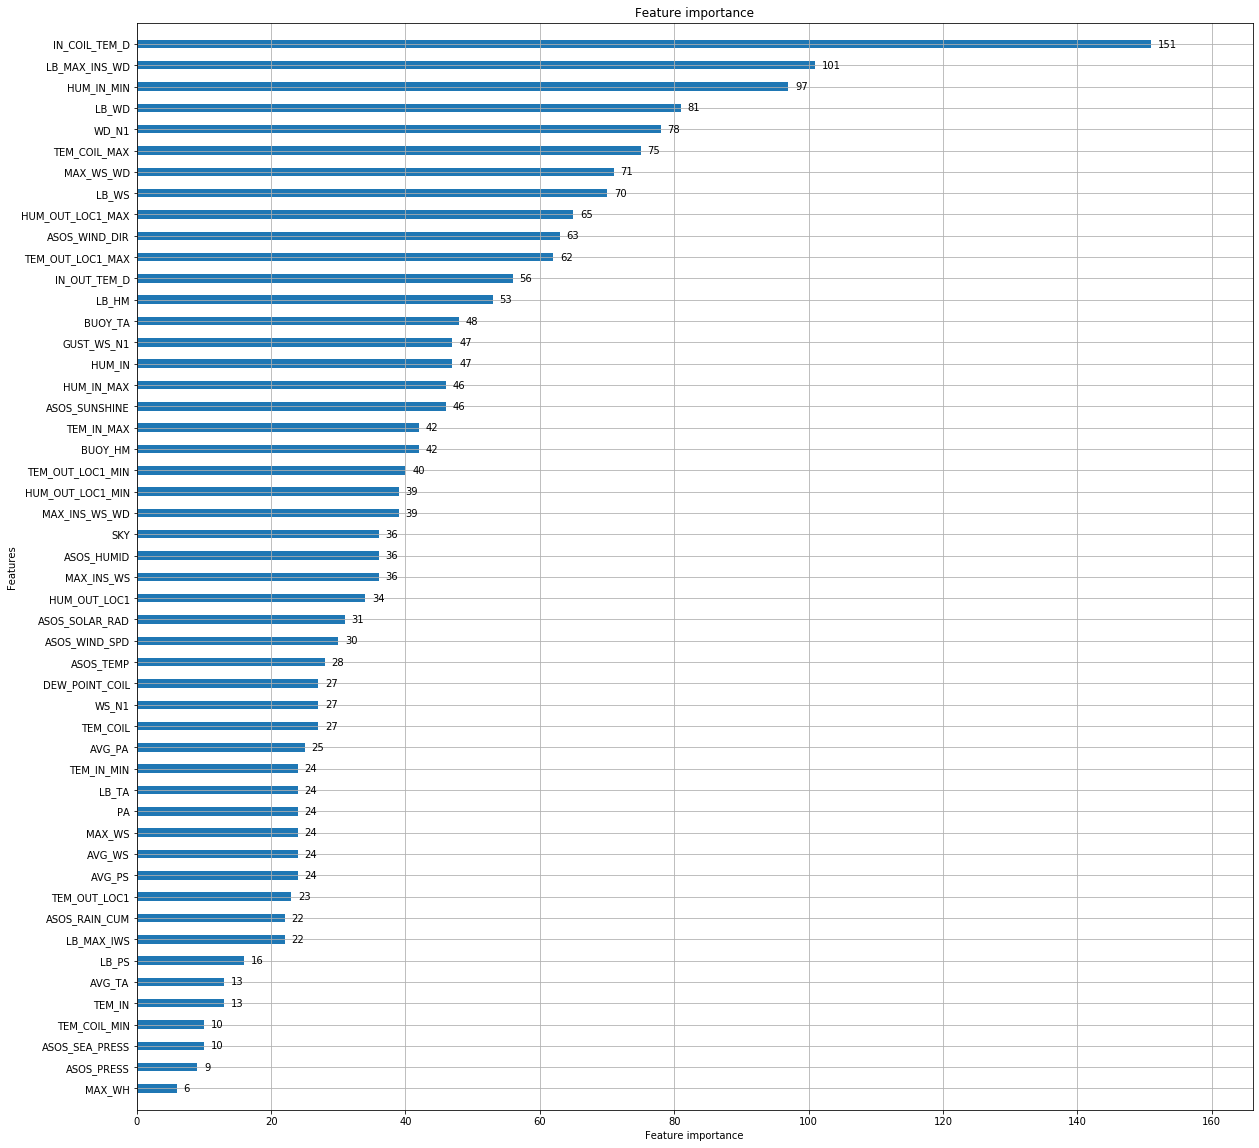

In [181]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_clf_under24, ax=ax,  max_num_features=50,height=0.4)

In [182]:
lgbm_model24_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under24.feature_importances_], columns=['variable', 'importance'])
lgbm_model24_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model24_df.tail(20)

,variable,importance
64,MONTH_5,4
71,MONTH_12,4
60,MONTH_1,3
55,PLANT_1,3
56,PLANT_2,2
59,LOC_3,2
68,MONTH_9,2
57,LOC_1,1
70,MONTH_11,1
10,HR1_RN,1


## 48 시간 결로 예측

### UnderSampling

In [183]:
from lightgbm import LGBMClassifier
lgbm_clf_under48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under48.fit(X_undersampled48, y_undersampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled48, y_undersampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_clf_under48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0113\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	training's auc: 0.968276	training's binary_logloss: 0.625286	valid_1's auc: 0.946768	valid_1's binary_logloss: 0.630854
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.971864	training's binary_logloss: 0.568707	valid_1's auc: 0.951267	valid_1's binary_logloss: 0.579558
[3]	training's auc: 0.976159	training's binary_logloss: 0.520375	valid_1's auc: 0.960408	valid_1's binary_logloss: 0.533883
[4]	training's auc: 0.977084	training's binary_logloss: 0.478824	valid_1's auc: 0.963988	valid_1's binary_logloss: 0.495274
[5]	training's auc: 0.97985	training's binary_logloss: 0.4439	valid_1's auc: 0.966279	valid_1's binary_logloss: 0.463602
[6]	training's auc: 0.979847	training's binary_logloss: 0.412917	valid_1's auc: 0.96725	valid_1's binary_logloss: 0.434804
[7]	training's auc: 0.981097	training's binary_logloss: 0.386698	valid_1's auc: 0.969371	valid_1's binary_logloss: 0.411141
[8]	training's auc: 0.982147	training's binary_logloss: 0.362212	valid_1's

[71]	training's auc: 1	training's binary_logloss: 0.0226256	valid_1's auc: 0.995585	valid_1's binary_logloss: 0.105637
[72]	training's auc: 1	training's binary_logloss: 0.0218442	valid_1's auc: 0.995663	valid_1's binary_logloss: 0.104916
[73]	training's auc: 1	training's binary_logloss: 0.0208991	valid_1's auc: 0.995666	valid_1's binary_logloss: 0.104068
[74]	training's auc: 1	training's binary_logloss: 0.0200466	valid_1's auc: 0.99572	valid_1's binary_logloss: 0.103156
[75]	training's auc: 1	training's binary_logloss: 0.0193149	valid_1's auc: 0.995785	valid_1's binary_logloss: 0.103046
[76]	training's auc: 1	training's binary_logloss: 0.0185971	valid_1's auc: 0.995845	valid_1's binary_logloss: 0.102315
[77]	training's auc: 1	training's binary_logloss: 0.0178338	valid_1's auc: 0.995883	valid_1's binary_logloss: 0.10154
[78]	training's auc: 1	training's binary_logloss: 0.0171785	valid_1's auc: 0.995887	valid_1's binary_logloss: 0.101473
[79]	training's auc: 1	training's binary_logloss: 

[145]	training's auc: 1	training's binary_logloss: 0.00132154	valid_1's auc: 0.997167	valid_1's binary_logloss: 0.0994426
[146]	training's auc: 1	training's binary_logloss: 0.00127202	valid_1's auc: 0.997175	valid_1's binary_logloss: 0.0994426
[147]	training's auc: 1	training's binary_logloss: 0.00122065	valid_1's auc: 0.997194	valid_1's binary_logloss: 0.0998445
[148]	training's auc: 1	training's binary_logloss: 0.00117153	valid_1's auc: 0.997198	valid_1's binary_logloss: 0.100164
[149]	training's auc: 1	training's binary_logloss: 0.0011317	valid_1's auc: 0.997226	valid_1's binary_logloss: 0.100277
[150]	training's auc: 1	training's binary_logloss: 0.00108342	valid_1's auc: 0.997239	valid_1's binary_logloss: 0.100465
[151]	training's auc: 1	training's binary_logloss: 0.00104337	valid_1's auc: 0.997253	valid_1's binary_logloss: 0.100556
[152]	training's auc: 1	training's binary_logloss: 0.00100707	valid_1's auc: 0.997269	valid_1's binary_logloss: 0.100665
[153]	training's auc: 1	traini

[220]	training's auc: 1	training's binary_logloss: 8.03934e-05	valid_1's auc: 0.997428	valid_1's binary_logloss: 0.117707
[221]	training's auc: 1	training's binary_logloss: 7.71997e-05	valid_1's auc: 0.997452	valid_1's binary_logloss: 0.117963
[222]	training's auc: 1	training's binary_logloss: 7.39824e-05	valid_1's auc: 0.997453	valid_1's binary_logloss: 0.11862
[223]	training's auc: 1	training's binary_logloss: 7.12026e-05	valid_1's auc: 0.99747	valid_1's binary_logloss: 0.11898
[224]	training's auc: 1	training's binary_logloss: 6.87293e-05	valid_1's auc: 0.997449	valid_1's binary_logloss: 0.119804
[225]	training's auc: 1	training's binary_logloss: 6.5917e-05	valid_1's auc: 0.997466	valid_1's binary_logloss: 0.120146
[226]	training's auc: 1	training's binary_logloss: 6.34319e-05	valid_1's auc: 0.997463	valid_1's binary_logloss: 0.120374
Early stopping, best iteration is:
[126]	training's auc: 1	training's binary_logloss: 0.00270467	valid_1's auc: 0.997076	valid_1's binary_logloss: 0.0

In [184]:
y_pred_under48 = lgbm_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.15      0.99      0.26       594

    accuracy                           0.97    104796
   macro avg       0.57      0.98      0.62    104796
weighted avg       1.00      0.97      0.98    104796



### 변수 중요도

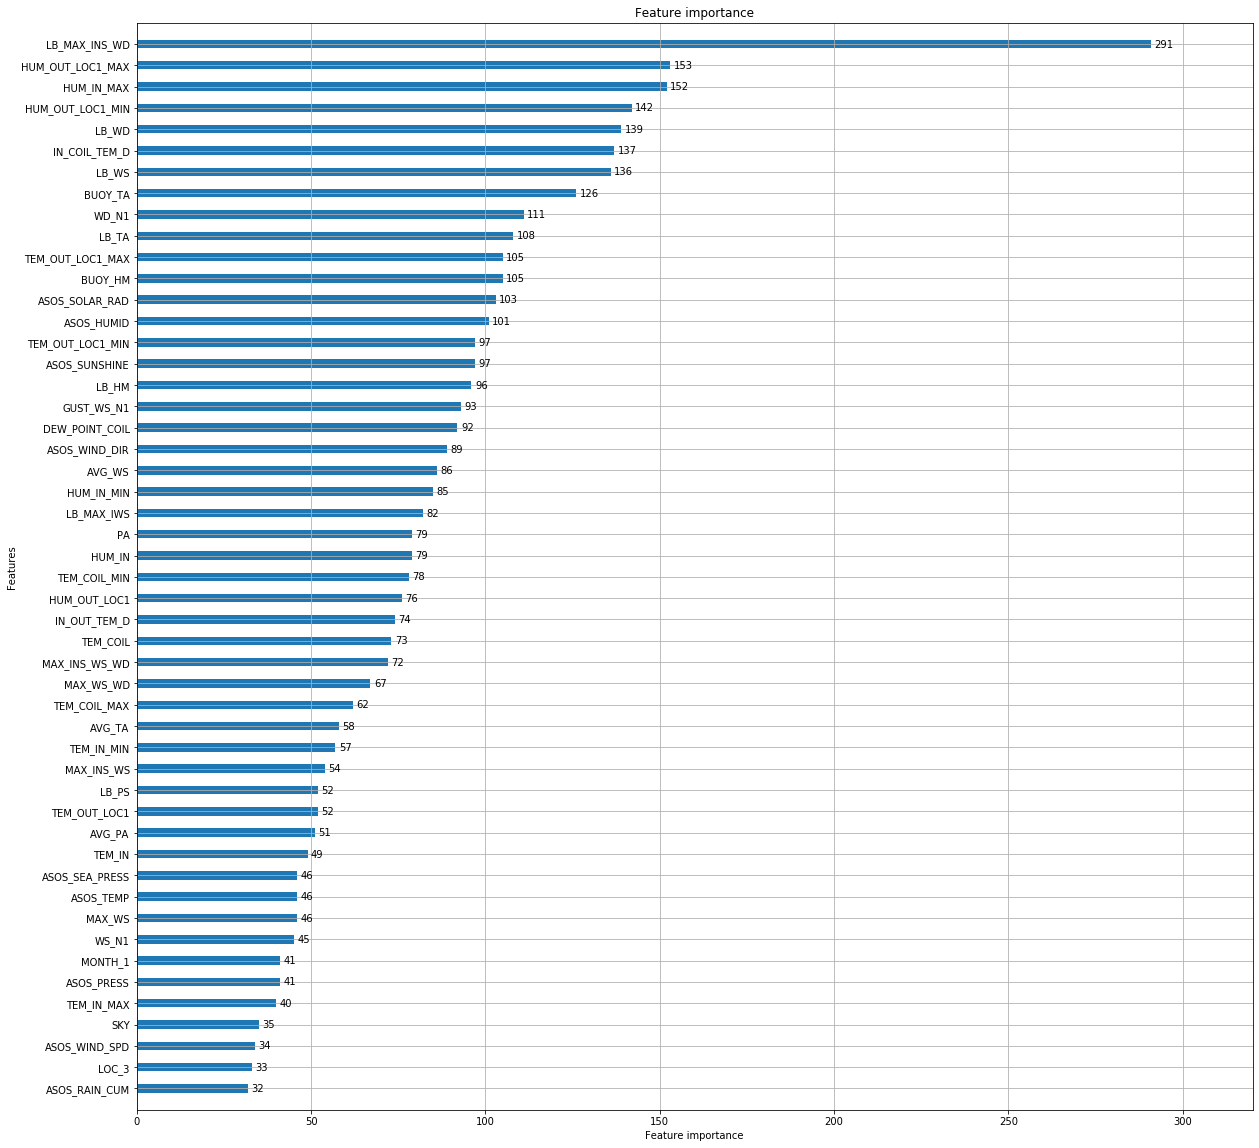

In [185]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_clf_under48, ax=ax,  max_num_features=50,height=0.4)

In [186]:
lgbm_model48_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under48.feature_importances_], columns=['variable', 'importance'])
lgbm_model48_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model48_df.tail(20)

,variable,importance
55,PLANT_1,21
71,MONTH_12,21
61,MONTH_2,20
56,PLANT_2,8
62,MONTH_3,6
68,MONTH_9,5
58,LOC_2,5
57,LOC_1,4
1,RULL_X24H_COND_LOC,3
23,MAX_WH,3


## 검증값 만들기

In [187]:
lgValiation =etl.makeValiation(test_data,lgbm_clf_under24,lgbm_clf_under48, test_X)
lgValiation

C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarnin

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
2,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,8,2020-03-31 11:30:00,0,0


In [188]:
etl.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1935,2019-11-15 15:30:00,2,1,2019-11-16 15:30:00,1,68,2019-11-17 15:30:00,0,37
1939,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,50,2019-11-17 19:00:00,1,50
1940,2019-11-15 19:30:00,1,2,2019-11-16 19:30:00,1,52,2019-11-17 19:30:00,0,5
1941,2019-11-15 20:00:00,1,2,2019-11-16 20:00:00,1,56,2019-11-17 20:00:00,0,2
1942,2019-11-15 21:00:00,1,2,2019-11-16 21:00:00,1,56,2019-11-17 21:00:00,0,1
...,...,...,...,...,...,...,...,...,...
3325,2020-03-08 11:00:00,1,1,2020-03-09 11:00:00,1,74,2020-03-10 11:00:00,0,0
3333,2020-03-09 11:30:00,1,2,2020-03-10 11:30:00,1,80,2020-03-11 11:30:00,0,1
3419,2020-03-18 16:30:00,2,2,2020-03-19 16:30:00,1,54,2020-03-20 16:30:00,0,12
3491,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,64,2020-03-27 20:00:00,0,0


In [189]:
etl.findCondRow(lgValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
457,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,0,20,2019-05-21 03:30:00,1,75
458,2019-05-19 10:30:00,1,3,2019-05-20 10:30:00,0,12,2019-05-21 10:30:00,1,53
1939,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,50,2019-11-17 19:00:00,1,50
2051,2019-11-22 03:30:00,1,3,2019-11-23 03:30:00,1,57,2019-11-24 03:30:00,1,69
2066,2019-11-22 21:00:00,1,2,2019-11-23 21:00:00,1,89,2019-11-24 21:00:00,1,70
...,...,...,...,...,...,...,...,...,...
3200,2020-02-23 18:30:00,2,2,2020-02-24 18:30:00,0,0,2020-02-25 18:30:00,1,72
3201,2020-02-23 22:00:00,2,2,2020-02-24 22:00:00,0,3,2020-02-25 22:00:00,1,76
3444,2020-03-21 21:30:00,1,3,2020-03-22 21:30:00,0,5,2020-03-23 21:30:00,1,73
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,75,2020-03-28 15:00:00,1,59


In [190]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24 시간 결로 예측

In [191]:
from xgboost import XGBClassifier

xgb_clf_under24 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under24.fit(X_undersampled24, y_undersampled24,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


C:\Users\B0113\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-logloss:0.61964
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.56004
[2]	validation_0-logloss:0.51061
[3]	validation_0-logloss:0.46791
[4]	validation_0-logloss:0.43145
[5]	validation_0-logloss:0.39992
[6]	validation_0-logloss:0.37234
[7]	validation_0-logloss:0.34699
[8]	validation_0-logloss:0.32478
[9]	validation_0-logloss:0.30514
[10]	validation_0-logloss:0.28819
[11]	validation_0-logloss:0.27245
[12]	validation_0-logloss:0.25822
[13]	validation_0-logloss:0.24602
[14]	validation_0-logloss:0.23450
[15]	validation_0-logloss:0.22545
[16]	validation_0-logloss:0.21596
[17]	validation_0-logloss:0.20858
[18]	validation_0-logloss:0.20091
[19]	validation_0-logloss:0.19477
[20]	validation_0-logloss:0.18905
[21]	validation_0-logloss:0.18309
[22]	validation_0-logloss:0.17814
[23]	validation_0-logloss:0.17336
[24]	validation_0-logloss:0.16938
[25]	validation_0-logloss:0.16529
[26]	validation_0-logloss:0.16142
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
y_pred_under24 = xgb_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.12      0.97      0.21       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.59    104796
weighted avg       0.99      0.96      0.97    104796



### 변수 중요도

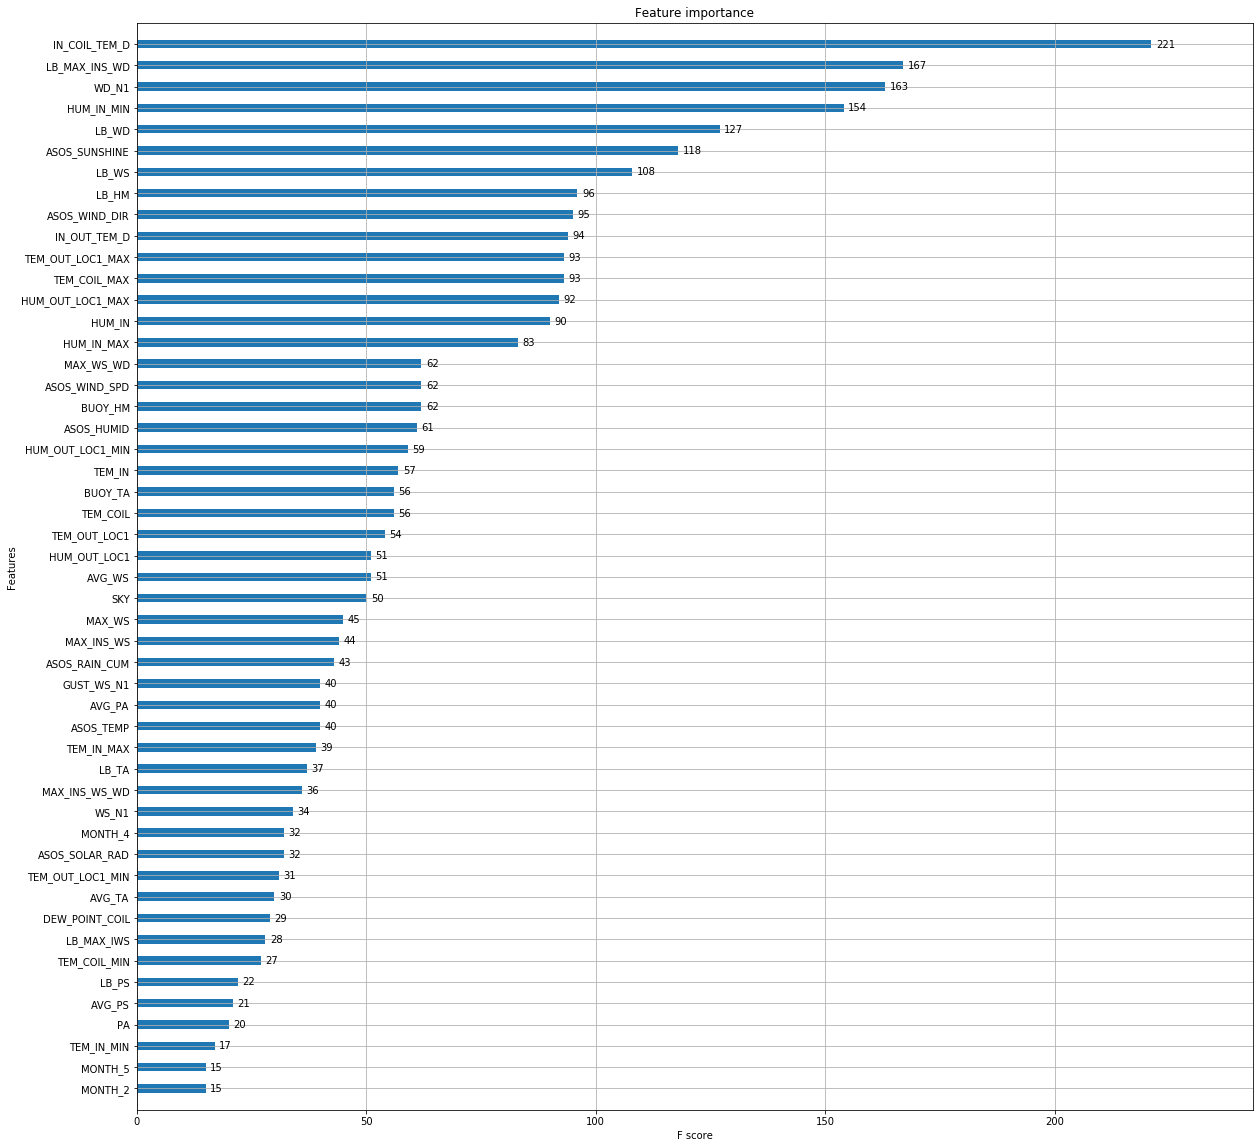

In [193]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_clf_under24, ax=ax,  max_num_features=50,height=0.4)

In [194]:
xgb_clf_under24_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under24.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under24_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under24_df.tail(20)

,variable,importance
13,MAX_WS,0.00493208
61,MONTH_2,0.00456802
38,ASOS_WIND_SPD,0.00444337
15,MAX_INS_WS,0.00413181
9,AVG_PS,0.0040215
16,MAX_INS_WS_WD,0.00397051
55,PLANT_1,0.00357539
39,ASOS_PRESS,0.00349048
10,HR1_RN,0.00335534
64,MONTH_5,0.00260604


## 48 시간 결로 예측

In [195]:
from xgboost import XGBClassifier

xgb_clf_under48 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under48.fit(X_undersampled48, y_undersampled48,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


C:\Users\B0113\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-logloss:0.62469
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.56500
[2]	validation_0-logloss:0.51359
[3]	validation_0-logloss:0.47146
[4]	validation_0-logloss:0.43832
[5]	validation_0-logloss:0.40861
[6]	validation_0-logloss:0.38215
[7]	validation_0-logloss:0.35939
[8]	validation_0-logloss:0.33906
[9]	validation_0-logloss:0.32108
[10]	validation_0-logloss:0.30508
[11]	validation_0-logloss:0.29086
[12]	validation_0-logloss:0.27894
[13]	validation_0-logloss:0.26588
[14]	validation_0-logloss:0.25546
[15]	validation_0-logloss:0.24562
[16]	validation_0-logloss:0.23555
[17]	validation_0-logloss:0.22894
[18]	validation_0-logloss:0.22176
[19]	validation_0-logloss:0.21386
[20]	validation_0-logloss:0.20830
[21]	validation_0-logloss:0.20130
[22]	validation_0-logloss:0.19682
[23]	validation_0-logloss:0.19093
[24]	validation_0-logloss:0.18778
[25]	validation_0-logloss:0.18492
[26]	validation_0-logloss:0.18066
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [196]:
y_pred_under48 = xgb_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.99      0.23       594

    accuracy                           0.96    104796
   macro avg       0.57      0.98      0.61    104796
weighted avg       1.00      0.96      0.98    104796



### 변수 중요도

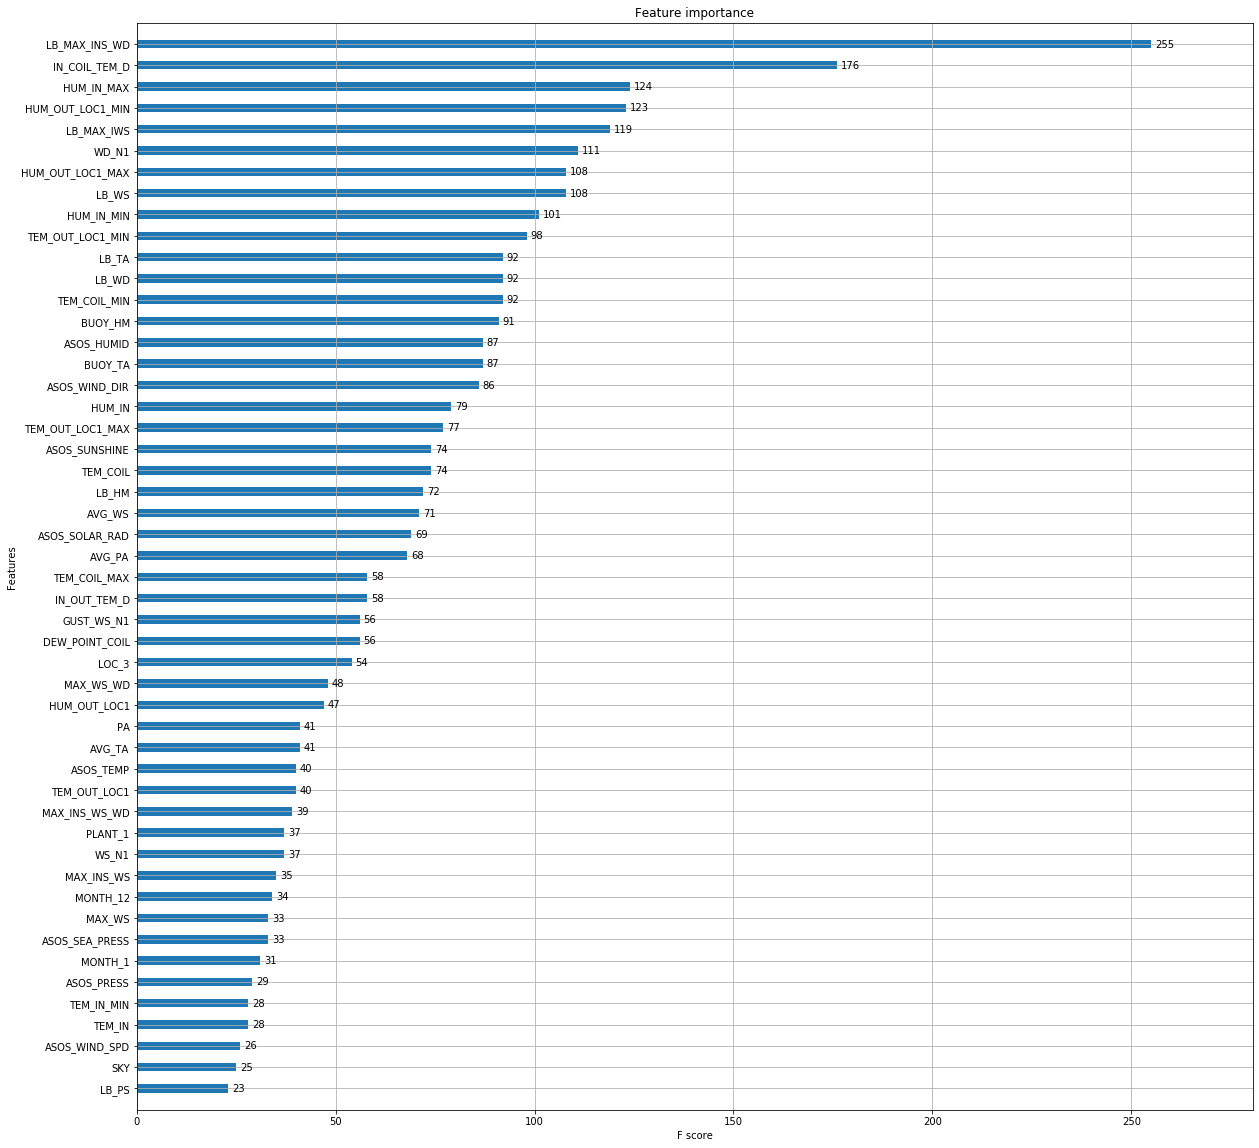

In [197]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_clf_under48, ax=ax,  max_num_features=50,height=0.4)

In [198]:
xgb_clf_under48_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under48.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under48_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under48_df.tail(20)

,variable,importance
3,TEM_IN,0.00527506
15,MAX_INS_WS,0.00505242
14,MAX_WS_WD,0.00472968
7,HUM_OUT_LOC1,0.00468548
24,AVG_WH,0.0046546
19,GUST_WS_N1,0.00455788
10,HR1_RN,0.0042281
33,IN_OUT_TEM_D,0.00406799
20,PA,0.00389763
61,MONTH_2,0.00325651


## 검증 값 만들기

In [199]:
xgValiation= etl.makeValiation(test_data, xgb_clf_under24, xgb_clf_under48, test_X)
xgValiation

C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarnin

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,7
2,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,3
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,4
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,2,2020-03-31 11:30:00,0,0


In [200]:
etl.findCondRow(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
25,2019-04-03 10:00:00,2,1,2019-04-04 10:00:00,1,51,2019-04-05 10:00:00,0,12
26,2019-04-03 11:00:00,2,2,2019-04-04 11:00:00,1,54,2019-04-05 11:00:00,0,7
56,2019-04-06 12:00:00,2,3,2019-04-07 12:00:00,1,58,2019-04-08 12:00:00,0,15
1935,2019-11-15 15:30:00,2,1,2019-11-16 15:30:00,1,90,2019-11-17 15:30:00,0,32
1938,2019-11-15 16:00:00,1,2,2019-11-16 16:00:00,1,60,2019-11-17 16:00:00,0,25
...,...,...,...,...,...,...,...,...,...
3412,2020-03-17 17:00:00,1,3,2020-03-18 17:00:00,1,55,2020-03-19 17:00:00,0,12
3441,2020-03-21 10:30:00,1,3,2020-03-22 10:30:00,1,74,2020-03-23 10:30:00,0,15
3443,2020-03-21 16:00:00,2,1,2020-03-22 16:00:00,1,63,2020-03-23 16:00:00,0,18
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,93,2020-03-28 15:00:00,0,43


In [201]:
etl.findCondRow(xgValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
218,2019-04-24 10:00:00,2,1,2019-04-25 10:00:00,0,2,2019-04-26 10:00:00,1,64
276,2019-04-30 06:30:00,1,3,2019-05-01 06:30:00,0,1,2019-05-02 06:30:00,1,76
2018,2019-11-17 04:30:00,1,3,2019-11-18 04:30:00,0,39,2019-11-19 04:30:00,1,50
2051,2019-11-22 03:30:00,1,3,2019-11-23 03:30:00,0,37,2019-11-24 03:30:00,1,68
2066,2019-11-22 21:00:00,1,2,2019-11-23 21:00:00,1,96,2019-11-24 21:00:00,1,60
...,...,...,...,...,...,...,...,...,...
3286,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,0,2020-03-05 22:30:00,1,79
3289,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,3,2020-03-05 23:00:00,1,70
3319,2020-03-07 15:00:00,2,2,2020-03-08 15:00:00,1,73,2020-03-09 15:00:00,1,64
3444,2020-03-21 21:30:00,1,3,2020-03-22 21:30:00,0,4,2020-03-23 21:30:00,1,71


In [202]:
etl.save_validation_csv(xgValiation,"xgboost")

# SVM

## 24시간 결로 예측

In [203]:
from sklearn.svm import SVC
svm_under24_clf = SVC(random_state=42,probability=True)
svm_under24_clf.fit(X_undersampled24, y_undersampled24)

C:\Users\B0113\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)

In [204]:
y_pred_under24 = svm_under24_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    104202
         1.0       0.08      0.98      0.16       594

    accuracy                           0.94    104796
   macro avg       0.54      0.96      0.56    104796
weighted avg       0.99      0.94      0.96    104796



## 48시간 결로 예측

In [205]:
from sklearn.svm import SVC
svm_under48_clf = SVC(random_state=42,probability=True)
svm_under48_clf.fit(X_undersampled48, y_undersampled48)

C:\Users\B0113\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)

In [206]:
y_pred_under48 = svm_under48_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96    104202
         1.0       0.07      0.95      0.13       594

    accuracy                           0.92    104796
   macro avg       0.53      0.94      0.54    104796
weighted avg       0.99      0.92      0.96    104796



In [207]:
svValiation= etl.makeValiation(test_data, svm_under24_clf, svm_under48_clf, test_X)
svValiation

C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0113\2020_weather_bd_contest_workspace\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarnin

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,10
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,1
2,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,7
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,6
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,8
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,1,2020-03-31 11:30:00,0,4


In [208]:
etl.findCondRow(svValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
175,2019-04-19 14:30:00,1,2,2019-04-20 14:30:00,1,82,2019-04-21 14:30:00,0,30
462,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,54,2019-05-21 15:00:00,0,20
463,2019-05-19 16:30:00,1,3,2019-05-20 16:30:00,1,61,2019-05-21 16:30:00,0,15
1959,2019-11-16 01:00:00,2,1,2019-11-17 01:00:00,1,43,2019-11-18 01:00:00,0,10
1964,2019-11-16 01:00:00,2,2,2019-11-17 01:00:00,1,47,2019-11-18 01:00:00,0,6
...,...,...,...,...,...,...,...,...,...
3491,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,46,2020-03-27 20:00:00,0,3
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,70,2020-03-28 15:00:00,1,83
3507,2020-03-26 19:00:00,2,2,2020-03-27 19:00:00,1,86,2020-03-28 19:00:00,0,33
3508,2020-03-26 16:30:00,1,2,2020-03-27 16:30:00,1,95,2020-03-28 16:30:00,1,75


In [209]:
etl.findCondRow(svValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
62,2019-04-07 02:30:00,2,2,2019-04-08 02:30:00,0,20,2019-04-09 02:30:00,1,48
63,2019-04-07 03:00:00,1,3,2019-04-08 03:00:00,0,6,2019-04-09 03:00:00,1,51
64,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,0,20,2019-04-09 03:00:00,1,54
211,2019-04-23 09:30:00,2,2,2019-04-24 09:30:00,0,23,2019-04-25 09:30:00,1,52
216,2019-04-24 01:30:00,1,1,2019-04-25 01:30:00,0,7,2019-04-26 01:30:00,1,70
...,...,...,...,...,...,...,...,...,...
3501,2020-03-26 02:30:00,2,1,2020-03-27 02:30:00,0,27,2020-03-28 02:30:00,1,42
3502,2020-03-26 04:00:00,2,1,2020-03-27 04:00:00,0,23,2020-03-28 04:00:00,1,58
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,70,2020-03-28 15:00:00,1,83
3508,2020-03-26 16:30:00,1,2,2020-03-27 16:30:00,1,95,2020-03-28 16:30:00,1,75


In [210]:
etl.save_validation_csv(svValiation,"svn")

# CatBoost

## 24 시간 결로 예측

In [211]:
from catboost import CatBoostClassifier
cat_under24_clf = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',depth=5)
# train the model
cat_under24_clf.fit(X_undersampled24, y_undersampled24)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
y_pred_under24 = cat_under24_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

In [ ]:
rf_clf_under24_df = pd.DataFrame(data=np.c_[train_X.columns.values, cat_under24_clf.feature_importances_], columns=['variable', 'importance'])
rf_clf_under24_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under24_df.tail(20)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48 시간 결로 예측

In [ ]:
from catboost import CatBoostClassifier
cat_under48_clf = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',depth=5)
# train the model
cat_under48_clf.fit(X_undersampled48, y_undersampled48)

In [ ]:
y_pred_under48 = cat_under48_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

In [ ]:
rf_clf_under48_df = pd.DataFrame(data=np.c_[train_X.columns.values, cat_under48_clf.feature_importances_], columns=['variable', 'importance'])
rf_clf_under48_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under48_df.tail(20)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [ ]:
catValiation=etl.makeValiation(test_data,cat_under24_clf,cat_under48_clf,test_X)

In [ ]:
etl.findCondRow(catValiation)

In [ ]:
etl.findCondRow(catValiation,48)

In [ ]:
etl.save_validation_csv(catValiation,"cat")

# Ensemble xgb, svn, lgb

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(estimators=[('xgb', xgb_clf_under24), ('svn', svm_under24_clf), ('lgb', lgbm_clf_under24)], voting='soft')
voting_model24.fit(X_undersampled24, y_undersampled24)

In [ ]:
y_pred24 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(estimators=[('xgb', xgb_clf_under48), ('svn', svm_under48_clf), ('lgb', lgbm_clf_under48)],voting='soft')
voting_model48.fit(X_undersampled48, y_undersampled48)

In [ ]:
y_pred48 = voting_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

In [ ]:
vtValiation = etl.makeValiation(test_data,voting_model24, voting_model48, test_X)

In [ ]:
etl.findCondRow(vtValiation)

In [ ]:
etl.findCondRow(vtValiation, 48)

In [ ]:
etl.save_validation_csv(vtValiation,"vt")

# Ensemble rf, svn, lgb

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(estimators=[('rf', rf_clf_under24), ('svn', svm_under24_clf), ('lgb', lgbm_clf_under24)], voting='soft')
voting_model24.fit(X_undersampled24, y_undersampled24)

In [ ]:
y_pred24 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(estimators=[('rf', rf_clf_under48), ('svn', svm_under48_clf), ('lgb', lgbm_clf_under48)], voting='soft')
voting_model48.fit(X_undersampled48, y_undersampled48)

In [ ]:
y_pred48 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

In [ ]:
vtValiation = etl.makeValiation(test_data, voting_model24, voting_model48, test_X)

In [ ]:
etl.findCondRow(vtValiation)

In [ ]:
etl.findCondRow(vtValiation, 48)